# W2V

In [1]:
import numpy as np

In [2]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display
from IPython.display import clear_output
from functools import partial

import ipywidgets as widgets
import numpy as np

In [3]:
text = 'I swear to you gentlemen, that to be overly conscious is a sickness, a real, thorough sickness'
text = text.replace(',','').lower()
vocab = list(set(text.split()))

In [4]:
vocab_size = len(vocab)
vector_size = 2

In [5]:
vocab

['that',
 'i',
 'real',
 'you',
 'to',
 'be',
 'conscious',
 'a',
 'swear',
 'thorough',
 'overly',
 'gentlemen',
 'is',
 'sickness']

In [6]:
def init_weights(vocab_size,vector_size):
    '''
    '''
    W_0 = np.random.random((vocab_size,vector_size))
    W_1 = np.random.random((vector_size,vocab_size))
    
    return np.matrix(W_0), np.matrix(W_1)

## CBOW

In [7]:
text_list = text.split()

In [8]:
text_list

['i',
 'swear',
 'to',
 'you',
 'gentlemen',
 'that',
 'to',
 'be',
 'overly',
 'conscious',
 'is',
 'a',
 'sickness',
 'a',
 'real',
 'thorough',
 'sickness']

In [9]:
W_0 , W_1 = init_weights(vocab_size,vector_size)

In [10]:
W_1.shape

(2, 14)

In [11]:
W_0[0].shape

(1, 2)

In [12]:
np.matmul(W_1.T,W_0[0].T).shape

(14, 1)

In [13]:
def get_posterior(input_word,w_1):
    
    a = np.matmul(w_1.T,input_word.T)
    a = np.exp(a)
    a = a / sum(a)
    return a

In [14]:
w_input = text_list[0]
w_output = text_list[1]   
input_vocab_index = vocab.index(w_input)
output_vocab_index = vocab.index(w_output)
y_observed = np.zeros(len(vocab))

w_i = W_0[input_vocab_index] # input vector

h = w_i.T

y_hat = get_posterior(w_i,W_1) # equation 3

y_observed[output_vocab_index] = 1
                      
y_observed = np.reshape(y_observed,(len(vocab),1))

dE_du = y_hat - y_observed # equation 8

In [26]:
y_hat

matrix([[0.09399832],
        [0.07912266],
        [0.05360679],
        [0.06884809],
        [0.07591537],
        [0.09492002],
        [0.08115482],
        [0.06006851],
        [0.08547399],
        [0.04918975],
        [0.06779915],
        [0.0565509 ],
        [0.07160894],
        [0.0617427 ]])

In [15]:
dE_dw1 = np.matmul(dE_du,h.T)

## Example step through the network

### input word vector

In [16]:
w_i = W_0[input_vocab_index] # input vector
print("word indixw_i)

SyntaxError: EOL while scanning string literal (<ipython-input-16-79e0048431bc>, line 2)

In [17]:
from functools import partial

In [18]:
class Counter:
   def __init__(self, initial=0):
      self.value = initial

   def increment(self, amount=1):
      self.value += amount
      return self.value

   def __iter__(self, sentinal=False):
      return iter(self.increment, sentinal)

In [20]:
def display_single_step(counter,b):
    
    with out:
        clear_output()
        current_index = counter.value
        w_input = text_list[current_index]
        w_output = text_list[current_index + 1]   
        input_vocab_index = vocab.index(w_input)
        output_vocab_index = vocab.index(w_output)

        print("*---New iteration----*")
        print(" ")
        print("Context word = '{}'".format(w_input))
        print(" ")
        print("Target word = '{}''".format(w_output))
        print(" ")
        w_i = W_0[input_vocab_index] # input vector
        print("Input vector {}".format(str(w_i)))
        print(" ")
        h = w_i.T
        print("Hidden {}".format(str(h)))
        print(" ")
        y_hat = get_posterior(w_i,W_1) # equation 3
        print("Y_hat {}".format(str(y_hat)))
        print(" ")
        y_observed = np.zeros(len(vocab))
        y_observed[output_vocab_index] = 1

        y_observed = np.reshape(y_observed,(len(vocab),1))
        print("Y observed {}".format(str(y_observed)))
        print(" ")
        dE_du = y_hat - y_observed # equation 8
        print("de_du {}".format(str(dE_du)))
        counter.increment()
        

In [21]:
out = widgets.Output()
display(out)

Output()

In [22]:
counter = Counter()
w = widgets.Button(description='Step')
w.on_click(partial(display_single_step, counter))
display(w)

Button(description='Step', style=ButtonStyle())

In [27]:
def run_simple_cbow(iters,text,vector_size):
    '''
        run through vocab the number of iters
        for each word in text:
            y = predict_next_word
            get the loss
            update the network
    '''
    
    text_list = text.split()
    text = text.replace(',','').lower()
    vocab = list(set(text.split()))
    vocab_size = len(vocab)
    alpha = 0.005 # learning rate
    
    W_0, W_1 = init_weights(vocab_size,vector_size)
    
    for _ in range(iters): # one iteration is a full walk through the tex
        
        for i in range(len(text_list[:-1])): # go up to the last word. No wrapping
            
            # for each input word we are going to make a prediction
            # for each word in the vocabulary
            prediction_vector = [] # 1 x vocab size
            gradient_vector_w = [] # gradient for 'input' weights. should be a 1 x vector size
            gradient_vector_w_2 = [] # gradient for output weights. 1 x vector size
            for j in range(vocab_size):
                
                w_input = text_list[i]
                w_output = text_list[i + 1]   
                input_vocab_index = vocab.index(w_input)
                output_vocab_index = vocab.index(w_output)
                y_observed = np.zeros(len(vocab))

                w_i = W_0[input_vocab_index] # input vector

                h = w_i.T # hidden layer equation 1

                y_hat = get_posterior(w_i,W_1) # equation 2,3 in one step

                y_observed[output_vocab_index] = 1

                dE_du = y_hat - y_observed # equation 8 also e_j 
                
                e_j = dE_du # for clarity matching notation to Rong

                dE_dw1 = alpha*dE_du*h # equation 9
                
                gradien_vector_w_2[j] = dE_dw1
                
                # now to update the input weights
                # equation 12 tells us that the change in the error w.r.t 
                # a single index of the hidden layer results in the sum of the error
                # for the current output j times the ith index for each word in the 
                # output weigths. como? que? makes sense in my mind
                
                dE_dW = np.zeros(vector_size) # equation 15
                for j_hidden in range(vector_size): # loop over each index in hidden layer
                    dE_dh_i = None
                    for j_2 in range(vocab_size):
                        dE_dh_i += e_j*W_1[j_hidden][j_2]
                        
                    dE_dW[j_hidden] = dE_dh_i
                    
                prediction_vector[j] = y_hat
                gradient_vector_w[j] = dE_dw1
                gradient_vector_w_2 = dE_dW
                
            # ok I think we can update now
            W_1[j]
                
                
                
            
            
        
        
        

In [28]:
[0.42659763 0.04893654]

SyntaxError: invalid syntax (<ipython-input-28-aac99b4a158c>, line 1)

In [37]:
w = np.array([[0.5093555 , 0.0924488 ],[0.13525068, 0.65054176]])

In [38]:
gradient = np.array([[0.03251563, 0.02791282],[0.00372998, 0.00320198]])

In [39]:
w = w - 0.005*gradient

In [40]:
w

array([[0.50919292, 0.09230924],
       [0.13523203, 0.65052575]])

In [1]:
import seaborn as sns; sns.set()

In [26]:
import matplotlib.pyplot as plt

In [57]:
%matplotlib inline

In [41]:
import numpy as np
import pandas as pd

In [ ]:
/Users/befeltingu/NeuralNetworks/NLP/data/cbow_simple_trans.npy

In [44]:
david_trans_matrix = np.load("/Users/befeltingu/NeuralNetworks/NLP/data/cbow_simple_trans.npy")

In [45]:
text = 'I swear to you gentlemen, that to be overly conscious is a sickness, a real, thorough sickness'
text = text.replace(',', '').lower()
text_list = text.split()
vocab = list(set(text.split()))
vocab_size = len(vocab)

In [46]:
np.argmax(david_trans_matrix[5])

0

In [47]:
david_trans_matrix[0] == david_trans_matrix[1]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [51]:
vocab

['gentlemen',
 'i',
 'conscious',
 'thorough',
 'be',
 'to',
 'sickness',
 'that',
 'is',
 'a',
 'swear',
 'overly',
 'you',
 'real']

In [49]:
plt.figure(figsize = (16,5))

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

In [60]:
data_df = pd.DataFrame(david_trans_matrix,columns=vocab)

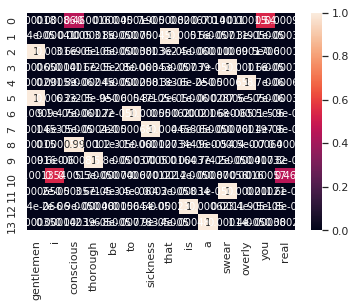

In [65]:
#fig, ax = plt.subplots(figsize=(20,20))
ax = sns.heatmap(data_df,annot=True)
#ax.set_xticklabels(vocab)
#ax.set_yticklabels(vocab)